# Data Visual 5 – Number of Male and Female Graduates Across Singapore’s Education Institutions Over the Years - Histogram

## Step 1 - Setup Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np

## Step 2 - Connect to SQL Database and Retrieve Data Table

In [5]:
# Database connection configuration
db_config = {
    'user': 'weaver',  
    'password': 'web101SG',  
    'host': 'localhost',
    'database': 'dbsingaporepoly', 
}

# Establish a connection to the database
conn = mysql.connector.connect(**db_config)

# Query to load the processed data from the MySQL table
query = "SELECT * FROM graduatesbyinstitutions_processed"

# Load the data into a pandas DataFrame
graduates_data = pd.read_sql(query, conn)

# Close the database connection
conn.close()

C:\Users\wrait\AppData\Local\Temp\ipykernel_32428\1489115277.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  graduates_data = pd.read_sql(query, conn)


## Step 3 - Setup Variables

In [10]:
# List of institutes
institutes = graduates_data.columns[2:]  # Assuming the first two columns are 'year' and 'sex'

# Convert all relevant columns to numeric, forcing errors to NaN
graduates_data[institutes] = graduates_data[institutes].apply(pd.to_numeric, errors='coerce')

# List of institutes
institutes = graduates_data.columns[2:]  # Extract the first two columns which are 'year' and 'sex'

In [ ]:
## Step 4 - Generate Histograms

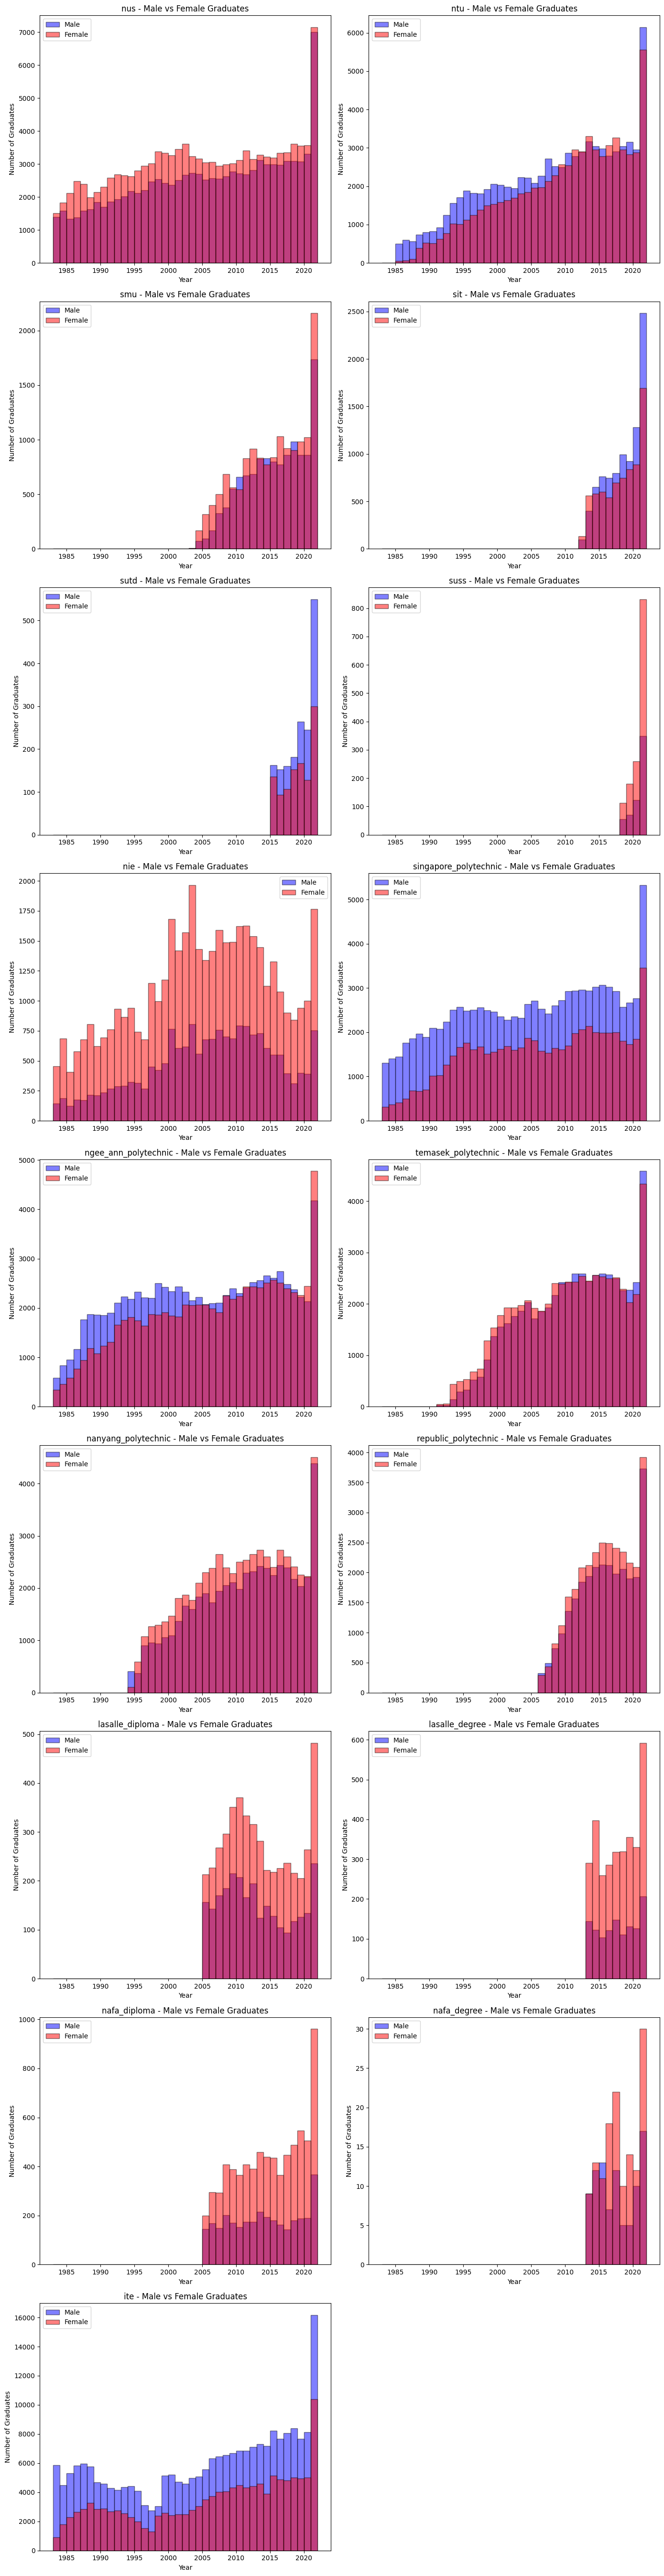

In [11]:
# List of years
years = graduates_data['year'].unique()

# Set up the grid layout
num_cols = 2  # Number of histograms per row
num_rows = (len(institutes) + num_cols - 1) // num_cols  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms for each institute
for i, institute in enumerate(institutes):
    # Filter data for the specific institute
    male_data = graduates_data[(graduates_data['sex'] == 'M') & (graduates_data[institute].notna())]
    female_data = graduates_data[(graduates_data['sex'] == 'F') & (graduates_data[institute].notna())]
    
    # Plot histogram for male and female comparison
    axes[i].hist(male_data['year'], weights=male_data[institute], bins=range(int(years.min()), int(years.max()) + 1), 
                 alpha=0.5, label='Male', color='blue', edgecolor='black')
    axes[i].hist(female_data['year'], weights=female_data[institute], bins=range(int(years.min()), int(years.max()) + 1), 
                 alpha=0.5, label='Female', color='red', edgecolor='black')
    
    axes[i].set_title(f'{institute} - Male vs Female Graduates')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Number of Graduates')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
